In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [3]:
def naive(p, q):
    ''' fill your code in here...
    '''
    minim = min(p.shape[0], q.shape[0])
    diff = [q[i]-p[i] for i in range(minim)]

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [4]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [5]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [6]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    p = p[rows.ravel()]
    q = q[cols.ravel()]
    # print(p.shape)
    # print(q.shape)

    if p.shape[0] > q.shape[0]:
        p_flat = p[:q.shape[0], :].flatten()
        q_flat = q.flatten()
        shape = q.shape[0]
        
    elif p.shape[0] < q.shape[0]:
        q_flat = q[:p.shape[0], :].flatten()
        p_flat = p.flatten()
        shape = p.shape[0]
    else:
        q_flat = q.flatten()
        p_flat = p.flatten()
        shape = p.shape[0]
    
    d =  (q_flat - p_flat)**2
    
    # print(d.shape)
    d = d.reshape(shape,2)
    d = np.sqrt(np.sum(d, axis=1))
    return d

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [7]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [8]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [9]:
# methods = [naive, with_indices, scipy_version, tensor_broadcasting]
methods = [with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p, q)
    timers.append(r)

24.7 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.39 µs ± 70.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.4 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


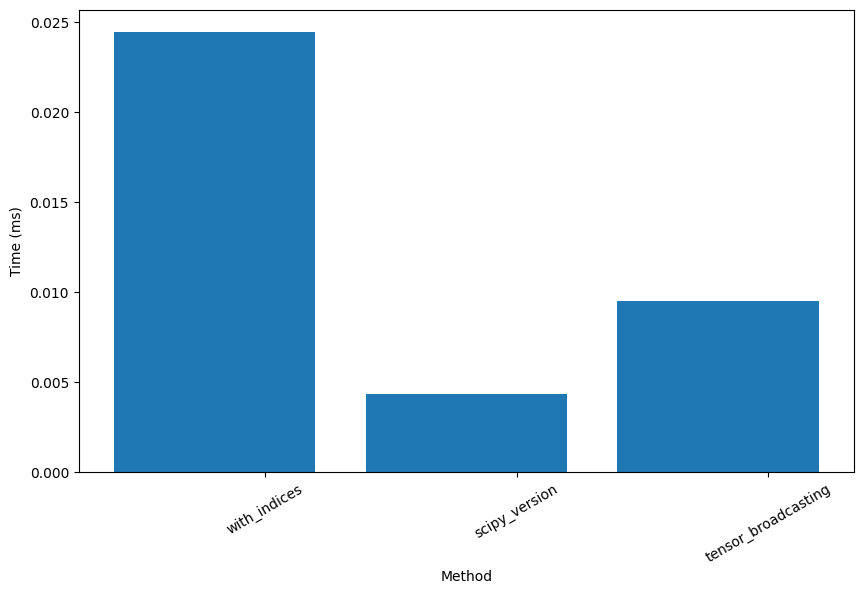

In [10]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()